<a href="https://colab.research.google.com/github/RitzKar/loan_default/blob/main/loan_default_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data is downloaded from Kaggle https://www.kaggle.com/datasets/saramah/loan-data/data

It is publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors).
The lending data spans from 2007-2010

Problem: Use a logistic regression to classify and predict whether or not the borrower paid back their loan in full.

**Target variable**:
**Not.fully.paid**: 1 if the loan is not fully paid and 0 otherwise.

**Predictor variables**
**credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

**purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

**int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

**installment**: The monthly installments owed by the borrower if the loan is funded.

**log.annual.inc**: The natural log of the self-reported annual income of the borrower.

**dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

**fico**: The FICO credit score of the borrower.

**days.with.cr.line**: The number of days the borrower has had a credit line.

**revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

**revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

**inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.

**delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

**pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [ ]:
# @title Reading the loan_data dataset
#https://www.kaggle.com/datasets/saramah/loan-data/data

import pandas as pd

# Importing train_test_split function from sklearn.model_selection to split the dataset into training and test sets.
from sklearn.model_selection import train_test_split

# Importing the LogisticRegression class from sklearn.linear_model to perform logistic regression.
from sklearn.linear_model import LogisticRegression

# Importing roc_curve from sklearn.metrics to compute the receiver operating characteristic (ROC) curve.
from sklearn.metrics import roc_curve

# Importing roc_auc_score from sklearn.metrics to compute the area under the ROC curve (AUC).
from sklearn.metrics import roc_auc_score

# Importing confusion_matrix from sklearn.metrics to compute the confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import confusion_matrix


loan_default = pd.read_csv('https://raw.githubusercontent.com/RitzKar/loan_default/main/loan_data.csv')
#loan_default["id"] = loan_default.index + 1

loan_default.head()
loan_default.info()
X=loan_default[['credit.policy','purpose','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.util','inq.last.6mths','delinq.2yrs','pub.rec']]
X = pd.get_dummies(X, columns=['purpose'], drop_first=True, dtype=float)

y=loan_default['not.fully.paid']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

X_train.head()
y_train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


4247    0
8766    0
1509    0
6120    1
1069    0
Name: not.fully.paid, dtype: int64

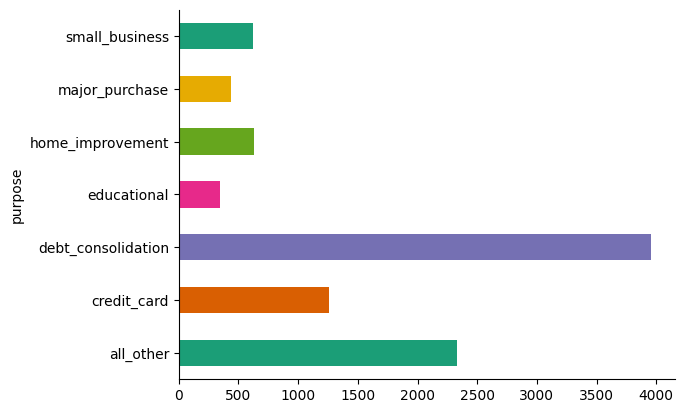

In [ ]:
# @title Distribution by purpose.

from matplotlib import pyplot as plt
import seaborn as sns
loan_default.groupby('purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Logistic Regression

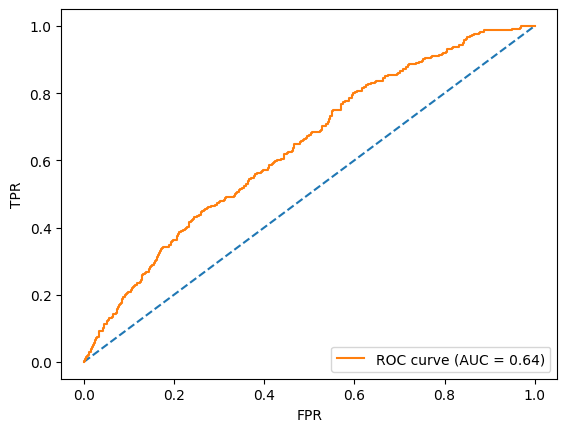

In [ ]:
# @title Logistic Regression
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

model = LogisticRegression(penalty='l2',fit_intercept=True).fit(X_train, y_train)
model.score(X_test, y_test)
#predictions = model.predict(X_test)
predictions = model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, predictions)
fpr, tpr, _ = roc_curve(y_test, predictions)
# Plot a diagonal line that represents a no-skill classifier (random guessing).
# This serves as a baseline against which the model's ROC curve can be compared.
plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the ROC curve for the model using the calculated FPR and TPR.
# Label the curve with the AUC score rounded to two decimal places.
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)

# Set the X-axis label to 'False Positive Rate (FPR)'.
plt.xlabel('FPR')

# Set the Y-axis label to 'True Positive Rate (TPR)'.
plt.ylabel('TPR')

# Display the legend in the lower right corner of the plot.
# The legend contains information about the plotted lines, such as the label 'ROC curve'.
plt.legend(loc='lower right')

# Render the plot to the screen.
# This will display the figure with the ROC curve and all the labels and annotations.
plt.show()



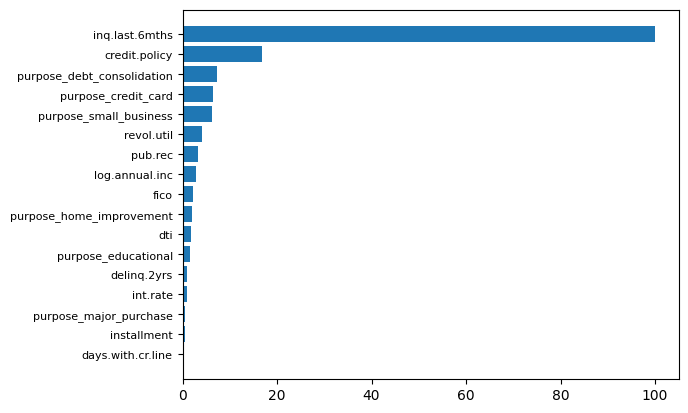

In [ ]:
import numpy as np
# @title Feature Importance
# Calculate the absolute value of the coefficients Logistic Regression.
# This is used to determine the importance of each feature in the model.
feature_importance = abs(model.coef_[0])

# Normalize the feature importances by dividing by the maximum importance and scaling to 100.
# This allows for easier comparison between features as it puts them on a relative scale where the most important feature is 100.
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Get the indices that would sort the feature importances array.
# This is used later for ordering the features by their importance when plotting.
sorted_idx = np.argsort(feature_importance)

# Create an array with positions for each bar in the horizontal bar chart (y-axis positions).
pos = np.arange(sorted_idx.shape[0]) + .5

# Initialize a new figure object with a specified size for plotting the feature importances.
featfig = plt.figure()

# # Add a subplot to the figure with a 1x1 grid and make it the first (and only) subplot.
featax = featfig.add_subplot(1, 1, 1)

# Plot the feature importances as a horizontal bar chart.
# The bars are centered on the y-axis positions from 'pos', and ordered according to 'sorted_idx'.
featax.barh(pos, feature_importance[sorted_idx], align='center')

# Set the y-ticks to be at the center of each bar in the bar chart.
featax.set_yticks(pos)

# Label the y-ticks with the corresponding feature names, ordered by sorted_idx.
# The feature names are taken from the columns of the dataset 'X' used to train the model.
# The fontsize is set to 8 for readability.
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)

# Display the plot showing the normalized feature importances.
# This visualization helps in understanding which features have the most influence on the model's predictions.
plt.show()


In [ ]:
print(model.coef_)

[[-2.56395475e-02  1.36180820e-03  6.63477963e-04  4.49703146e-03
   2.87899666e-03 -3.50161016e-03 -1.25708686e-05  6.36359333e-03
   1.52925044e-01  1.38789583e-03  5.07346366e-03 -9.72246389e-03
  -1.10834836e-02  2.41704009e-03  2.93061814e-03 -8.84192886e-04
   9.57127945e-03]]


In [ ]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.838162359697207
0.8408141962421712
